<a href="https://colab.research.google.com/github/21anirudh/Data-Preprocessing-And-Feature-Engineering/blob/main/DataPreprocessingAndFeatureEngineering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [38]:
df = pd.read_csv("diabetes.csv")

In [39]:
print(df.shape)
print(df.head())

(2000, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


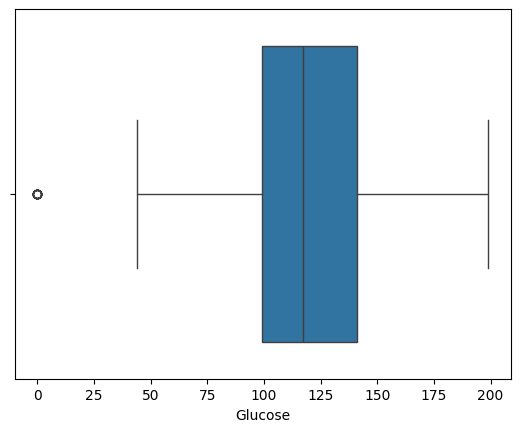

In [40]:
sns.boxplot(x=df["Glucose"])
plt.show()

In [41]:
# Inter Quartile Range - Measure of spread of dataset
q1 = df["Glucose"].quantile(0.25)
q3 = df["Glucose"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [42]:
# Finding the Outliers
print(df[(df["Glucose"] < low) | (df["Glucose"] > up)].any(axis=None))
print(df[(df["Glucose"] < low)].any(axis=None))
print(df[(df["Glucose"] < low) | (df["Glucose"] > up)])
print(df[(df["Glucose"] < low) | (df["Glucose"] > up)].index)

True
True
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
20              6        0             68             41        0  39.0   
75              1        0             48             20        0  24.7   
182             1        0             74             20       23  27.7   
342             1        0             68             35        0  32.0   
349             5        0             80             32        0  41.0   
502             6        0             68             41        0  39.0   
812             1        0             68             35        0  32.0   
819             5        0             80             32        0  41.0   
972             6        0             68             41        0  39.0   
1340            1        0             74             20       23  27.7   
1595            1        0             68             35        0  32.0   
1602            5        0             80             32        0  41.0   
1896           

In [43]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in ["id"]]
print(num_cols)

# Checking outliers in numerical columns of df
for col in num_cols:
    print(df[(df[col] < low) | (df[col] > up)].any(axis=None))

Observations: 2000
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
True
True
True
True
True
True
True
True


In [44]:
def grab_outliers(dataframe, col_name, outlier_index=False, f = 5):
    quartile1 = dataframe[col_name].quantile(0.25)
    quartile3 = dataframe[col_name].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up = quartile3 + 1.5 * interquantile_range
    low = quartile1 - 1.5 * interquantile_range

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head(f))
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if outlier_index:
        out_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return out_index

Glucose_index = grab_outliers(df, "Glucose", True)
print(Glucose_index)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
20             6        0             68             41        0  39.0   
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   

     DiabetesPedigreeFunction  Age  Outcome  
20                      0.727   41        1  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
Index([20, 75, 182, 342, 349, 502, 812, 819, 972, 1340, 1595, 1602, 1896], dtype='int64')


In [45]:
quartile1 = df["Glucose"].quantile(0.25)
quartile3 = df["Glucose"].quantile(0.75)
interquantile_range = quartile3 - quartile1
up = quartile3 + 1.5 * interquantile_range
low = quartile1 - 1.5 * interquantile_range

In [46]:
# Removing Outliers
def remove_outlier(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.25)
    quartile3 = dataframe[col_name].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up = quartile3 + 1.5 * interquantile_range
    low = quartile1 - 1.5 * interquantile_range
    df_without_outliers = dataframe[~((dataframe[col_name] < low) | (dataframe[col_name] > up))]
    return df_without_outliers

In [47]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2000
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [48]:
for col in num_cols:
    df = remove_outlier(df, col)

print(df.shape)

(1655, 9)


In [49]:
def replace_with_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up = quartile3 + 1.5 * interquantile_range
    low = quartile1 - 1.5 * interquantile_range
    dataframe.loc[(dataframe[variable] < low), variable] = low
    dataframe.loc[(dataframe[variable] > up), variable] = up

In [50]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1655
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [51]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [52]:
for col in num_cols:
    print(col, print(df[(df[col] < low) | (df[col] > up)].any(axis=None)))

True
Pregnancies None
False
Glucose None
False
BloodPressure None
True
SkinThickness None
True
Insulin None
True
BMI None
True
DiabetesPedigreeFunction None
True
Age None


In [53]:
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
print(df_scores)

[-1.1940179  -1.18094315 -1.03123267 ... -1.06723712 -1.09754303
 -0.99421258]


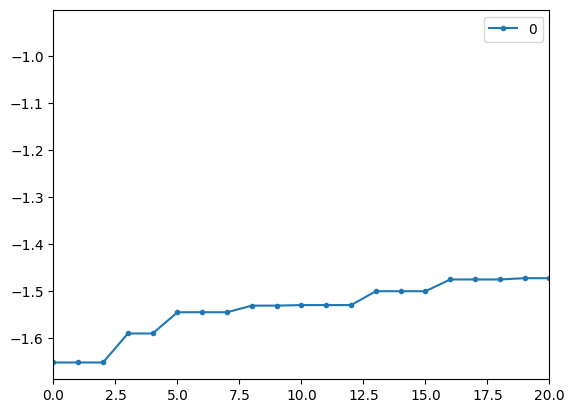

In [54]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

In [55]:
threshold = np.sort(df_scores)[6] #graph becomes stable at 6th point
print(df[df_scores < threshold])

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
62            5.0     44.0             62              0        0  25.0   
672          10.0     68.0            104             23       49  35.5   
1129         10.0     68.0            104             23       49  35.5   
1760         10.0     68.0            104             23       49  35.5   
1883          5.0     44.0             62              0        0  25.0   

      DiabetesPedigreeFunction   Age  Outcome  
62                       0.587  36.0        0  
672                      0.285  47.0        0  
1129                     0.285  47.0        0  
1760                     0.285  47.0        0  
1883                     0.587  36.0        0  


In [56]:
print(df.drop(axis=0, labels=df[df_scores < threshold].index).shape)

(1650, 9)
